<img src="Figs/fga.png" alt="isolated"/>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets

In [2]:
def rect_pulse(A,fs,T): 
    r""" Generate isolated rectangular pulse with the following parameters
    Parameters: 
    A : amplitude of the rectangular pulse 
    fs : sampling frequency in Hz 
    T : duration of the pulse in seconds 
    Returns: (t,g) : 
    time base (t) and the signal g(t) as tuple 
    Example:
     A = 1;
     fs=500;T = 0.2; 
     (t,g) = rect_pulse(A,fs,T) """ 
    
    t = np.arange(-0.5,0.5,1/fs) # time base 
    rect = (t >-T/2) * (t<T/2) + 0.5*(t==T/2) + 0.5*(t==-T/2)
    g = A*rect 
    return (t,g)

<h1 style="text-align: center;"> Modulações Digitais </h1>

<h3 style="text-align: center;">Disciplina: Comunicações Digitais para Engenaharia</h3>


<p style="text-align: center;">Prof. Daniel C. Araújo</p>

## Conteúdo

1. [Introdução](#Intro)
2. [Modulações sem Memória](#mod_sem_mem)

 # Introdução  <a name ="intro"></a>



## Representação de sinais digitais

* Modulação sem memória
    * Conjunto de k bits são mapeados para um símbolo

* Modulação com memória
    * Conjunto de k bits e os anteriores $(L-1)k$ bits.
    * A saída depende das sequências anteriores e a atual

<img src="Figs/mod_digi/digi_mod.png" alt="isolated" />


## Transmissão de Bits

* Tempo de Símbolo e Tempo de bit

$$
T_b = \frac{T_s}{k} = \frac{T_s}{\log_2M}
$$

* Taxa de bits e taxa de símbolo

$$
R_b = kR_s = R_s \log_2M
$$

* Energia do sinal e Energia de bits

$$
E_{avg} = \sum _{m=1}^{M} p_m E_m 
$$
em que, $p_m$ são as probabilidades dos símbolos

Se os bits são equiprováveis então:

$$
E_{b} = \frac{E_{avg}}{\log_2M}  
$$

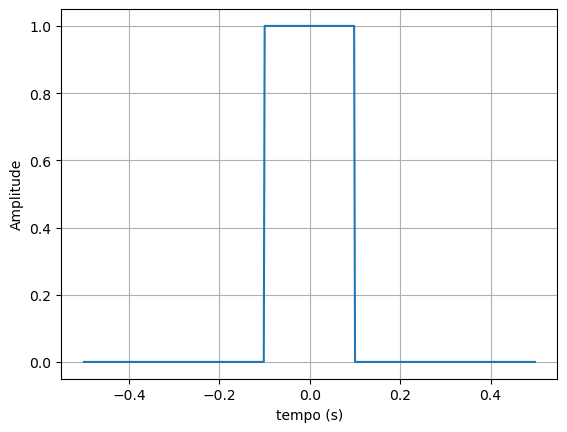

Tempo de bit 0.2 s
Taxa de bits 5.0 Hz


In [3]:
A = 1
fs=500
Tb = 0.2 
(t,g) = rect_pulse(A,fs,Tb) 

plt.plot(t,g)
plt.xlabel("tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

print("Tempo de bit", Tb, "s")
print("Taxa de bits", 1/Tb, "Hz")

# Modulações sem Memória  <a name="mod_sem_mem"></a>

## Modulação PAM

> Definição: Pulse Modulation Amplitude (PAM/ASK)

* forma de onda

   $$
    s_m(t) = A_m p(t), \,\  0 \leq m \leq M - 1
   $$

* Amplitudes 

  $$
  A_m = 2m + 1 - M 
  $$

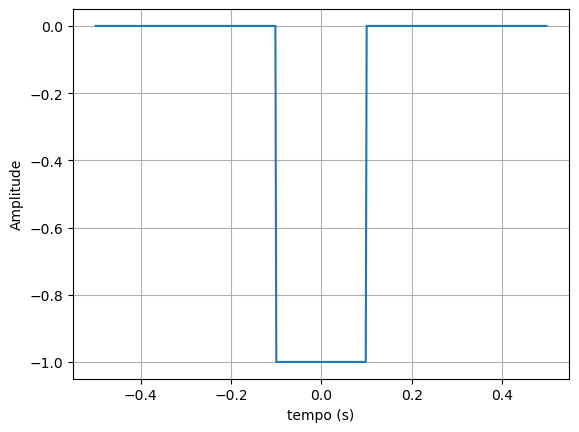

Tempo de bit 0.2 s
Taxa de bits 5.0 Hz


In [4]:
def mod_pam(integer, M,fs,Tb):

    A_m = 2*integer  - M + 1

    return rect_pulse(A_m,fs,Tb)

A = 1
fs=500
Tb = 0.2 
M = 4
integer = 1    # integer < M
(t,g) = mod_pam(integer, M,fs,Tb) 

plt.plot(t,g)
plt.xlabel("tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

print("Tempo de bit", Tb, "s")
print("Taxa de bits", 1/Tb, "Hz")

## Energia do símbolo

$$
\begin{align*}
    E_s   & = \int _{-\infty}^{\infty} |s_m(t)|^2 dt \\
         & = \int _{-\infty}^{\infty} A^2_m p(t)^2 dt \\
         &  = A^2_m E_p 
\end{align*}
$$

## Energia média da constelação
$$
\begin{align*}
    E_{avg}   & = \frac{E_p}{M} \sum _{m=1}^{M}A^2_m \\
              & = \frac{2E_p}{M} \left(1 + 3^2 + \ldots + (M-1)^2 \right) \\
              & = \frac{2E_p}{M} \frac{M(M^2-1)}{6} \\
              & = \frac{E_p(M^2-1)}{3}
\end{align*}  
$$
Portanto a energia média de bits

$$
E_{b} = \frac{E_{avg}}{\log_2M}  = \frac{E_p(M^2-1)}{3\log_2M}
$$

## Representação em Banda Básica e Banda Passante

Assumindo que a representação de banda-básica seja 

$$
s_{ml} = A_m p(t)
$$
em que $p(t)$ é real

então sua representação de banda-passante é

$$
\begin{align*}
s_m(t) &= A_m p(t) \cos (2\pi f_c t) \\
       &= A_m g(t)
\end{align*}  
$$

* A energia média de banda-passante será metade da energia de banda-básica:

$$
E_{b} = \frac{E_p(M^2-1)}{6\log_2M}
$$

## Símbolo PAM

* A representação de banda-básica pode ser reescrita como

$$
s_ml(t) =  A_m \sqrt{E_p} \phi(t),
$$
em que $\phi (t) = \frac{p(t)}{\sqrt{E_p}}$.

* Símbolos PAM

 $$
 s_m  =  A_m \sqrt{E_p} , \,\ A_m =\{\pm 1, \pm 3, \ldots , \pm (M - 1)\}
 $$



In [5]:
def plot_pam_scatter(M,Ep=1):


    m = np.arange(0,M)
    

    smr = (2*m - M + 1) * np.sqrt(Ep)
    smi = np.zeros(len(smr))

    plt.plot(smr,smi,'o')
    plt.xlabel('Componente em fase')
    plt.ylabel('Componente em quadratura')
    plt.xlim([np.min(smr) - np.sqrt(Ep),np.max(smr) + np.sqrt(Ep)])
    plt.grid()
    plt.show()

M = widgets.Dropdown(
    options=[2,4,8,16,32],
    value=2,
    description='Ordem da modulação',
    disabled=False,
)

ui = widgets.HBox([M])

out = widgets.interactive_output(plot_pam_scatter, {'M': M})

display(out, ui)


Output()

## Distância Entre Símbolos da Modulação AM

* Considere a distância euclidiana entre dois pontos 

$$
\begin{align*}
d_{nm} & = \sqrt{|s_m - s_n|^2} \\
& = |A_m - A_n|\sqrt{E_p} \\
\end{align*}
$$

Portanto a distância mínima entre dois símbolos será:

$$
\begin{align*}
d_{min} & = 2\sqrt{E_p} \\
& = \sqrt{2E_g} \\ 
& = \sqrt{\frac{12\log_2M}{M^2-1}E_b} 
\end{align*}
$$

In [6]:
def pam_dist(M,Eb):
    return np.sqrt(12*np.log2(M)/(M**2 -1)*Eb)
def plot_dist_min(Eb):
    M = np.array([2,4,8,16,32])
    d = pam_dist(M,Eb)

    plt.plot(M,d)
    plt.xlabel('Ordem da modulação')
    plt.ylabel('Distância entre símbolos')
    plt.grid()
    plt.ylim([0.01,2])
    plt.show()


eb = widgets.FloatSlider(min=0.1,max=2,step=0.01, description="Energia de bit")
ui = widgets.HBox([eb])

out = widgets.interactive_output(plot_dist_min, {'Eb': eb})

display(out, ui)

Output()

## Exercício

* Programar um modulador M-PAM 
    * Obter a scatterplot na saída do modulador
    * Sinal de banda-básica
        * Considere o pulso retangular
    * Sinal de banda–passante


## Modulação PSK  

> Definição: *Phase Shift Keying* (PSK)

$$
\begin{align*}
s_m(t)& = Re\left[ g(t) e^{\jmath \frac{2\pi (m-1)}{M}} e^{\jmath 2\pi f_c t}\right] \\
      & = g(t) \cos \left[ 2\pi f_c t +  \frac{2\pi (m-1)}{M} \right] \\
      & =  g(t) \cos \left[  \frac{2\pi (m-1)}{M} \right] \cos \left[ 2\pi f_c t \right]  - g(t) \sin \left[  \frac{2\pi (m-1)}{M} \right] \sin \left[ 2\pi f_c t \right] 
\end{align*}
$$

> Representação em banda passante:  $$ g(t) \cos \left[  \frac{2\pi (m-1)}{M} \right] \cos \left[ 2\pi f_c t \right]  - g(t) \sin \left[  \frac{2\pi (m-1)}{M} \right] \sin \left[ 2\pi f_c t \right] $$

É possível reescrever em função do sinais de base

$$ \sqrt{\frac{E_g}{2}} \cos \left[  \frac{2\pi (m-1)}{M} \right] \phi_1(t)  + \sqrt{\frac{E_g}{2}}\sin \left[  \frac{2\pi (m-1)}{M} \right] \phi_2(t) $$

em que 
$$
\begin{align*}
\phi_1(t) & =  \sqrt{\frac{2}{E_g}} g(t)\cos \left[ 2\pi f_c t \right] \\
\phi_2(t) & =  - \sqrt{\frac{2}{E_g}} g(t)\sin \left[ 2\pi f_c t \right] \\
\end{align*}
$$

In [7]:
def psk_mod(integer,Eg,M):

    in_phase   = np.sqrt(Eg/2)*np.cos(2*np.pi*(integer -1 )/M)
    quadrature = np.sqrt(Eg/2)*np.sin(2*np.pi*(integer -1 )/M)

    return in_phase, quadrature

def plot_scatter(M):
    
    m = np.linspace(0,M-1,M).astype(int)
    Eg = 1

    simbolo = psk_mod(m,Eg,M)

    plt.scatter(simbolo[0],simbolo[1])
    plt.xlabel('Componente em fase')
    plt.ylabel('Componente em quadratura')
    plt.ylim([-Eg,Eg])
    plt.grid()
    plt.show()

M = widgets.Dropdown(
    options=[2,4,8,16,32],
    value=2,
    description='Ordem da modulação',
    disabled=False,
)

ui = widgets.HBox([M])

out = widgets.interactive_output(plot_scatter, {'M': M})

display(out, ui)



Output()

## Distância entre símbolos 

> Distância euclidiana entre símbolos

$$
\begin{align*}
d_{nm} & = \sqrt{|s_m - s_n|^2} \\
& = \sqrt{E_g\left[1 - \cos \left(  \frac{2\pi (m-n)}{M} \right) \right]} \\
\end{align*}
$$
considerando símbolos adjacentes $|m-n|=1$

$$
\begin{align*}
d_{nm} & = \sqrt{E_g\left[1 - \cos \left(  \frac{2\pi}{M} \right) \right]} \\
       & = \sqrt{2 E_g \sin ^2 \left(  \frac{\pi}{M} \right) }
\end{align*}
$$
Considerando a aproximação $\sin \left(  \frac{\pi}{M} \right) \approx \frac{\pi}{M}$ 

$$
\begin{align*}
d_{nm} & \approx \sqrt{2 E_g  \left(  \frac{\pi}{M} \right)^2 }        \\
       & \approx \sqrt{4 \log_2M E_b \left(  \frac{\pi}{M} \right)^2 }  \\
       & \approx 2\sqrt{  E_b  \frac{\log_2M \pi^2}{M^2} }
\end{align*}
$$


In [8]:
def psk_dist(M,Eb):
    return 2*np.sqrt(np.log2(M)*np.sin(np.pi/M)**2*Eb)
def plot_dist_min(Eb):

    M = np.array([2,4,8,16,32,64,128])

    d_pam = pam_dist(M,Eb)
    d_psk = psk_dist(M,Eb)

    plt.plot(M,d_pam,'rx-',label='PAM')
    plt.plot(M,d_psk,'bo-',label='PSK')

    plt.xlabel('Ordem da modulação')
    plt.ylabel('Distância entre símbolos')
    plt.legend()
    plt.grid()
    plt.ylim([0.01,4])
    plt.show()


eb = widgets.FloatSlider(min=0.1,max=2,step=0.01, description="Energia de bit")
ui = widgets.HBox([eb])

out = widgets.interactive_output(plot_dist_min, {'Eb': eb})

display(out, ui)

Output()

## Exercício



## Modualação M-QAM

> Definição: *Quadrature Amplitude Modulation* (QAM)

$$
\begin{align*}
s_m(t)& = Re\left[(A_{mi} + \jmath A_{mq}) g(t) e^{\jmath 2\pi f_c t}\right] \\
      & =  g(t) A_{mi} \cos \left[ 2\pi f_c t \right]  - g(t) A_{mq} \sin \left[ 2\pi f_c t \right] 
\end{align*}
$$

Alternativamente, 
$$
\begin{align*}
s_m(t)& = Re\left[(r_m e^{\jmath \theta_m} e^{\jmath 2\pi f_c t}\right] \\
      & = r_m \cos \left[ 2\pi f_c t + \theta_m \right]  
\end{align*}
$$
em que,
$$
\begin{align*}
r_m         & =\sqrt{A^2_{mi} + A^2_{mq} } \\
\theta      & = \tan^{-1}\left( \frac{A_{mq}}{A_{mi}}\right)
\end{align*}
$$


## Símbolo QAM

Similarment ao símbolo PSK, tem-se que 

$$
s_m(t) = \sqrt{\frac{E_g}{2}}A_{mi}\phi_1(t) + \sqrt{\frac{E_g}{2}}A_{mq}\phi_w(t) 
$$

O símbolo pode ser representado vetorialmente pelas componentes de banda-básica
$$
s_m = \left[\sqrt{\frac{E_g}{2}}A_{mi},\sqrt{\frac{E_g}{2}}A_{mq}\right]
$$

A energia do símbolo pode ser calculada como a norma ao quadrado do vetor $s_m$

$$
\begin{align*}
E_m &= ||s_m||^2 \\
    &= \frac{E_g}{2} \left(A^2_{mi} + A^2_{mq}\right)
\end{align*}
$$

## Distância entre símbolos

$$
\begin{align*}
d_{nm} & = \sqrt{|s_m - s_n|^2} \\
       & = \sqrt{\frac{E_g}{2} \left[ \left(A_{mi} - A_{ni} \right)^2 + \left(A_{mq} - A_{nq} \right)^2 \right]} \\
\end{align*}
$$

Considerando que o M-QAM é formado por duas constelações PAM então cada componente obdece a seguinte regra

$$
A_{m_i} = 2m + 1 - M 
$$
Portanto, para símbolos adjacentes tem-se que 

$$
\begin{align*}
d_{min} & = \sqrt{\frac{E_g}{2} \left[ \left(2 \right)^2  \right]} \\
        & = \sqrt{2 E_g } \\
\end{align*}
$$

## Exercício
  Demonstre qual a energia média de uma modulação M-QAM formada pela combinação de 2 M-PAM.

## Comparativo entre as modulações

| Esquema | $s_m(t)$ | $s_m$ | $E_{avg}$ | $E_{bavg}$ |$d_{min}$|
---|:---:|:---:|:---:|:---:|:---:|
Banda básica PAM | $A_m p(t)$ | $A_m \sqrt{E_p}$ | $\frac{2(M^2-1)}{3}E_p$ |  $\frac{2(M^2-1)}{3\log_2 M}E_p$ | $\sqrt{\frac{6\log_2 M}{(M^2-1)}E_{bavg}}$|
Banda passante PAM | $A_m g(t) \cos (2\pi f_c t)$ | $A_m \sqrt{\frac{E_g}{2}}$ | $\frac{(M^2-1)}{3}E_g$ |  $\frac{(M^2-1)}{3\log_2 M}E_g$ | $\sqrt{\frac{6\log_2 M}{(M^2-1)}E_{bavg}}$|
PSK | $g(t) \cos (2\pi f_c t + \frac{2\pi}{M}(m-1))$ | $\sqrt{\frac{E_g}{2}}(\cos \left[  \frac{2\pi (m-1)}{M} \right],\sin \left[  \frac{2\pi (m-1)}{M} \right])$ |  $\frac{1}{2}E_g$ |  $\frac{1}{2\log_2 M}E_g$ | $2\sqrt{\log_2 M \sin ^2 \left(  \frac{\pi}{M} \right) E_{bavg}}$|
QAM | $ g(t) A_{mi} \cos \left[ 2\pi f_c t \right]  - g(t) A_{mq} \sin \left[ 2\pi f_c t \right] $ | $\sqrt{\frac{E_g}{2}}(A_{mi},A_{mq})$ |  $\frac{M-1}{3}E_g$ |  $\frac{M-1}{3\log_2 M}E_g$ | $\sqrt{\frac{6\log_2 M}{(M^2-1)}E_{bavg}}$|


## Exercício 

Implementar modulador M-QAM
  * Obtenha o scatterplot na saída do modulador
  * Sinal de banda-básica considerando um pulso formatador retangular
  * Sinal de banda-passante

## Modulação FSK
> Definição : *Frequency shift keying* (FSK)

$$
\begin{align*}
s_m(t) &= Re\left[s_{ml}(t)e^{\jmath 2\pi f_ct}\right], \,\ 1 \leq m \leq M, \,\ 0 \leq t \leq T \\
       &= \frac{2E}{T} \cos(2\pi f_c t + 2\pi m \Delta f t)
\end{align*}
$$

em que
$$

\begin{align*}
s_{ml}(t) &= \sqrt{\frac{2E}{T}} e^{\jmath 2\pi m \Delta f t}
\end{align*}
$$



In [18]:
def fsk_baseband(m,delta_f,T,fs,E=1):

    A = np.sqrt(2*E/T)

    nSamples = int(fs*T)
    t = np.linspace(0,T,nSamples)/fs
    phase = 2*np.pi*m*delta_f*t

    return  A*np.exp(1j*phase), t

def plot_fsk_baseband(m,M=8,Delta_f=10):
    
    fs      = 2*M*Delta_f
    T       = 1000/fs
    sml, t = fsk_baseband(m,Delta_f,T,fs)

    plt.plot(t, np.real(sml),'r--',label="Componente em fase")
    plt.plot(t, np.imag(sml),'b',label="Componente em Quadratura")

    plt.xlabel('tempo (s)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.legend()
    plt.show()
M=8

m = widgets.Dropdown(
    options=list(np.linspace(0,M-1,M).astype(int)),
    value=0,
    description='Símbolo',
    disabled=False,
)

ui = widgets.HBox([m])

out = widgets.interactive_output(plot_fsk_baseband, {'m': m})

display(out, ui)

Output()

## Ortogonalidade entre os Símbolos

$$
\textrm{Re}\left[ \int _{0}^{T} s_{ml}(t)s_{nl}(t)dt \right] = 0
$$

Calculando a integral:
$$
\begin{align*}
\left< s_{ml}(t), s_{nl}(t)\right>  &= \frac{2E}{T} \int _{0}^{T} e^{\jmath 2 \pi (m-n)\Delta ft} dt \\
           & = \frac{2E \sin \left( \pi T (m-n) \Delta f \right)}{\pi T (m-n) \Delta f} e^{\jmath 2 \pi (m-n)\Delta ft} \\
\end{align*}
$$

Substituindo em 
Calculando a integral:
$$
\begin{align*}
\textrm{Re}\left[ \int _{0}^{T} s_{ml}(t)s_{nl}(t)dt \right] & = \frac{2E \sin \left( \pi T (m-n) \Delta f \right)}{\pi T (m-n) \Delta f} \cos({ 2 \pi (m-n)\Delta ft}) \\
& =  \frac{2E \sin \left( 2\pi T (m-n) \Delta f \right)}{2\pi T (m-n) \Delta f} \\
& =  2E \textrm{sinc} \left( 2\pi T (m-n) \Delta f \right)
\end{align*}
$$

Condição de ortogonalidade é garantida quando 

$$
\Delta f = \frac{1}{2T}
$$

In [27]:
def correlacao_entre_simbolos(Deltaf,T,m,n,E=1):

    return 2*E*np.sinc(2*T*(m-n)*Deltaf)

def plot_correlacao(Deltaf,n,M=8):
   
    T = 0.5
    m = np.linspace(0,M-1,M)

    corr = correlacao_entre_simbolos(Deltaf,T,m,n,E=1)

    plt.stem(m,corr,'x')
    plt.xlabel('Índice dos símbolos')
    plt.ylabel('Correlação')
    plt.ylim([0,2])

    plt.grid()
    plt.show()


df = widgets.FloatSlider(min=0,max=1/0.5,step=0.001, description="Índice de modulação ")

n = widgets.Dropdown(
    options=np.linspace(0,M-1,M).astype(int),
    value=0,
    description='Símbolo',
    disabled=False,
)


# An HBox lays out its children horizontally
ui = widgets.HBox([df,n])

out = widgets.interactive_output(plot_correlacao, {'Deltaf': df,'n':n})

display(out, ui)


Output()